In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# All font sizes are set to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

In [3]:
np.random.seed(121)

N = 1000
std = 0.6
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])

Text(0, 0.5, 'Width')

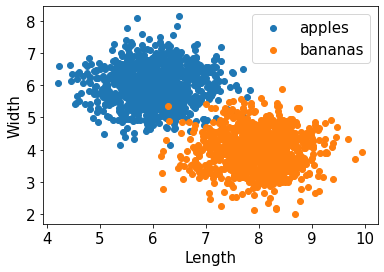

In [4]:
plt.scatter(x=apples['length'], y=apples['width'], label='apples')
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')

######### The above codes are equivalent to the following codes. For data frames( pandas Object) can be assigned directly by column name #########
# plt.scatter(x='length', y='width', data=apples, label='apples')
# plt.scatter(x='length', y='width', data=bananas, label='bananas')
# plt.legend()

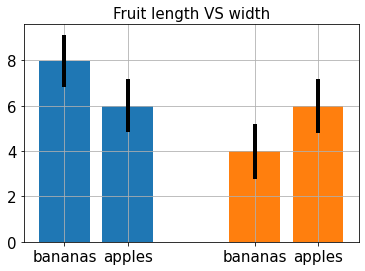

In [5]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]
yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()

Text(0.5, 1.0, 'Length Distribution ')

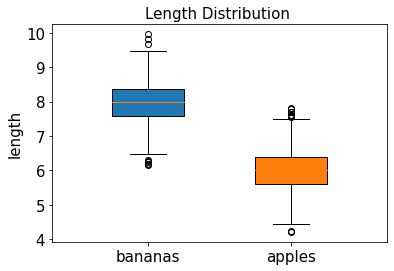

In [6]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')


Text(0.5, 0, 'Width')

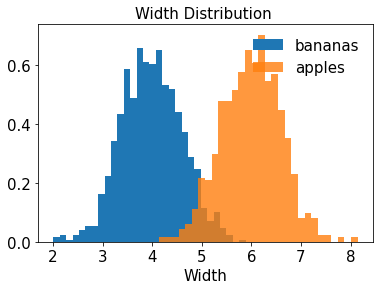

In [7]:
fea = 'width'

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')

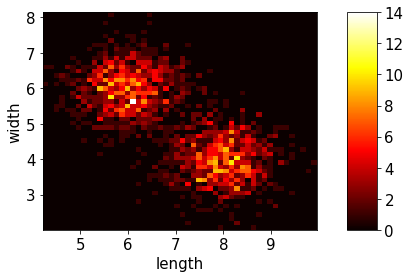

In [8]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Text(0.5, 0, 'L/W ratio')

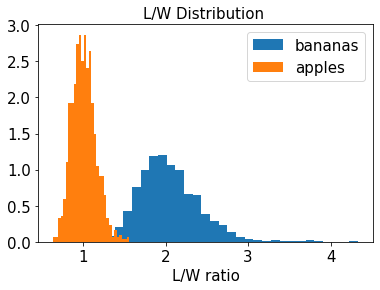

In [9]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

Text(0.5, 0, 'Area')

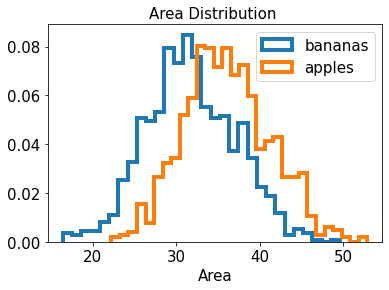

In [10]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

Text(0.5, 0, 'Circumference')

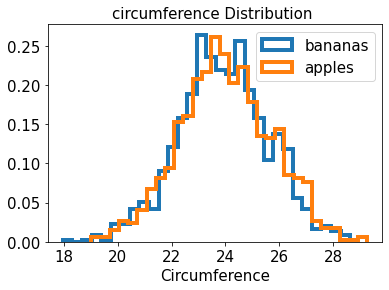

In [11]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')

In [14]:
from scipy import stats
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=82.438425661083, pvalue=0.0)

In [15]:
ea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-18.33979554877528, pvalue=1.4737736564093967e-69)

In [16]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096)

In [17]:
def distance_L(fea_1, fea_2, center_x, center_y, data):
    x_x = np.power(data[fea_1]-center_x, 2)  # (x-cx)^2
    y_y = np.power(data[fea_2]-center_y, 2)  # (y-cy)^2
    return np.array(np.sqrt(x_x+y_y))

In [18]:
def train_centers(fea_1, fea_2, centers, data):
    # Cluster centers obtained by last iteration
    (center1_x, center1_y), (center2_x, center2_y) = centers

    # The Euclidean distances from cluster center 1 and cluster center 2 are calculated respectively
    distance_1 = distance_L(fea_1, fea_2, center1_x, center1_y, data)
    distance_2 = distance_L(fea_1, fea_2, center2_x, center2_y, data)

    # For the data points which are close to the Euclidean distance of center1, their mean values are new cluster centers
    center1_x = data.loc[distance_1 < distance_2, fea_1].mean()
    center1_y = data.loc[distance_1 < distance_2, fea_2].mean()

    # For the data points which are close to the Euclidean distance of center2, their mean value is the new cluster center
    center2_x = data.loc[distance_1 > distance_2, fea_1].mean()
    center2_y = data.loc[distance_1 > distance_2, fea_2].mean()

    return (center1_x, center1_y), (center2_x, center2_y)


# test
train_centers('length', 'width', centers=((3, 3), (8, 8)), data=fruits)
# (3,3), (8,8)) became ((6.286898045335904, 4.2832890208506464), (7.082150034373463, 5.088522425327138) after one training

((6.286898045335904, 4.2832890208506464),
 (7.082150034373463, 5.088522425327138))

In [19]:
def pred_centers(x, y, centers):
    (center1_x, center1_y), (center2_x, center2_y) = centers
    # Distance between x,y and cluster center to be predicted
    d1 = np.sqrt(np.power(x-center1_x, 2)+np.power(y-center1_y, 2))
    d2 = np.sqrt(np.power(x-center2_x, 2)+np.power(y-center2_y, 2))
    # If the distance from center1 cluster center is less than center2, then it is 0; otherwise, it is 1. Here, bool is directly converted to int
    pred_classes = np.array(d1 < d2, dtype='int')
    return pred_classes

# test
x = np.array([[1, 1, 1], [5, 5, 5], [10, 10, 10]])
y = np.array([[1, 5, 10], [1, 5, 10], [1, 5, 10]])
pred_centers(x, y, [[3, 6], [9, 5]])

array([[1, 1, 1],
       [1, 1, 1],
       [0, 0, 0]])

In [20]:
np.random.seed(122)
fea_1, fea_2 = 'length', 'width'
epochs = 5
centers = np.random.randint(low=3, high=10, size=(2, 2))  # Random initialization of banana and apple cluster centers
centers_all = [centers]  # Save the cluster center of all iterations
for i in range(epochs):
    centers = train_centers(fea_1, fea_2, centers, data=fruits)
    centers_all.append(centers)

centers_all[:2]

[array([[5, 5],
        [9, 7]]),
 ((6.5143691190390625, 5.177757867221544),
  (8.199241667306879, 4.528661649079994))]

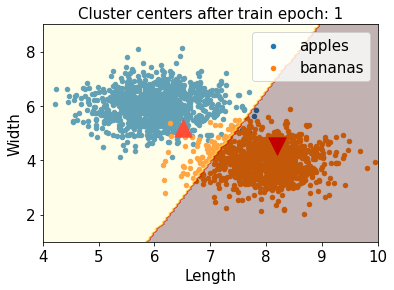

In [21]:
epoch = 1

# Draw raw data map of fruit
plt.scatter(x=apples['length'], y=apples['width'], label='apples', s=20)
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas', s=20)

# Draw cluster centers
(center1_x, center1_y), (center2_x, center2_y) = centers_all[epoch]
plt.scatter(center1_x, center1_y, marker='^', s=300, c='r')
plt.scatter(center2_x, center2_y, marker='v', s=300, c='r')

plt.xlim(4, 10)
plt.ylim(1, 9)

# Draw classification boundaries
x = np.linspace(4, 10, 100)
y = np.linspace(1, 9, 100)

X, Y = np.meshgrid(x, y)
Z = pred_centers(X, Y, centers_all[epoch])
plt.contourf(X, Y, Z, cmap=plt.cm.hot, alpha=0.3)
plt.xlabel('Length')
plt.ylabel('Width')

# Title legend
plt.title('Cluster centers after train epoch: %d' % epoch)
plt.legend()

c:\users\amin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
c:\users\amin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.


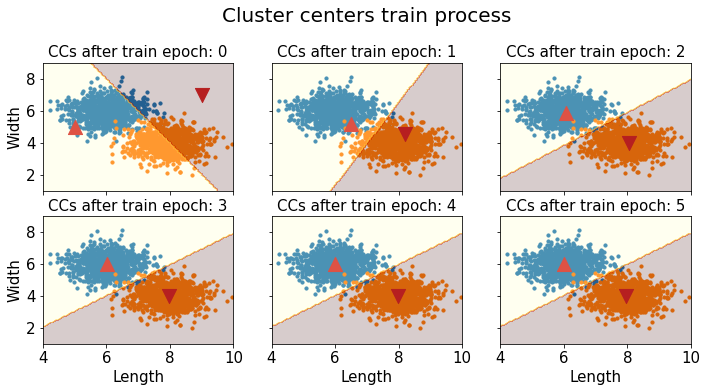

In [23]:
# The classification boundary and cluster center of the six iterations are visualized
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
fig.suptitle('Cluster centers train process',fontsize=20,va='top')
axs = axs.ravel()
for epoch, ax in enumerate(axs):
    ax.scatter(x=apples['length'], y=apples['width'], label='apples', s=10)
    ax.scatter(x=bananas['length'], y=bananas['width'], label='bananas', s=10)

    (center1_x, center1_y), (center2_x, center2_y) = centers_all[epoch]
    ax.scatter(center1_x, center1_y, marker='^', s=200, c='tab:red')
    ax.scatter(center2_x, center2_y, marker='v', s=200, c='tab:red')

    ax.set_xlim(4, 10)
    ax.set_ylim(1, 9)

    ax.set_title('CCs after train epoch: %d' % epoch)

    x = np.linspace(4, 10, 100)
    y = np.linspace(1, 9, 100)

    X, Y = np.meshgrid(x, y)
    Z = pred_centers(X, Y, centers_all[epoch])
    ax.contourf(X, Y, Z, cmap=plt.cm.hot, alpha=0.2)
    
    # Add the y-axis title to the left and right of the first column
    if ax.is_first_col():
        ax.set_ylabel('Width')
    # Add an x-axis title at the bottom of the last line    
    if ax.is_last_row():
        ax.set_xlabel('Length')
        
plt.subplots_adjust(bottom=0.2,top=0.85,left=0.05,right=0.95) 